In [2]:
import sys
# adding Folder_2 to the system path
sys.path.insert(0, '/home/sanj/projects/gaardian/workflow/scripts/')
import probetools as probe
from probetools import log
import pandas as pd
%run hapclust.py

In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [20]:
expr['gene'][:2].to_list()

['AGAP006220', 'AGAP006221']

In [4]:
d = {}
r = {}

sps = ['gambiae', 'coluzzi','arabiensis']
for sp in sps:
    expr = pd.read_csv(f"../../results/expression/swept_genes_expr_Anopheles {sp}.csv").rename(columns={'Unnamed: 0':'gene'})

    read_diff = expr.loc[expr['gene'].str.contains('diff')]
    expr = expr.loc[~expr['gene'].str.contains('diff')]
    expr = expr.drop(columns='means')
    expr = expr.melt('gene', var_name='Population', value_name='FC')
    expr['species'] = sp
    expr['FC'] = np.log2(expr['FC'])
    read_diff.drop(columns='means')
    read_diff = read_diff.melt('gene', var_name='Population', value_name='read_difference')
    read_diff['species'] = sp
    d[sp] = expr
    r[sp] = read_diff

In [5]:
expr = pd.concat(d)
read = pd.concat(r)
genes_exclude = expr['gene'][:2].to_list()
genes_exclude
expr = expr.query("gene not in @genes_exclude")
a = sns.color_palette("Set1", 3)

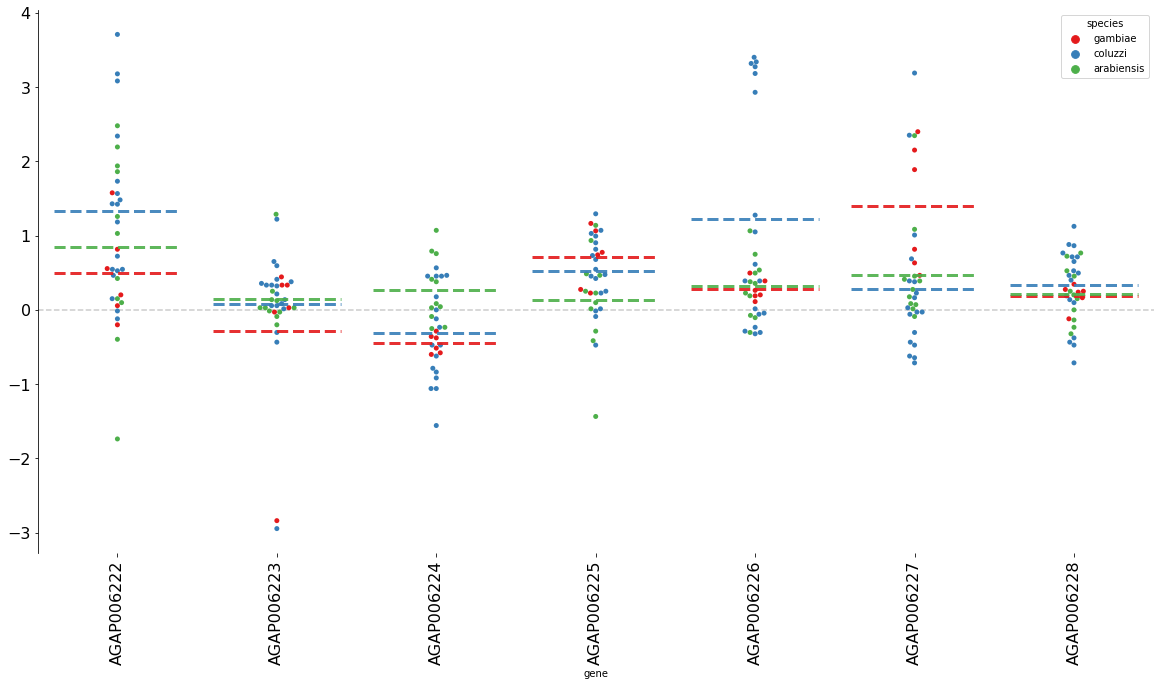

In [28]:
my_pal = {"gambiae": "indianred", "coluzzi": "dodgerblue", "arabiensis":"limegreen"}

fig, ax = plt.subplots(1, figsize=[20,10])

ax.axhline(0, ls='--', c='grey', alpha=0.4)

sns.swarmplot(ax=ax, data=expr, x='gene', y='FC', hue='species', palette=a)
for i, sp in enumerate(sps):
    sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': a[i], 'ls': '--', 'lw': 3, 'alpha':0.9},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="gene",
            y="FC",
            data=expr.query(f"species == '{sp}'"),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)


#sns.swarmplot(ax=ax[1], data=read, x='read_difference', y='gene', hue='species', palette=a)
#_lg = ax[0].get_legend()
#_lg.remove()
ax.tick_params(axis="y", labelsize=16)
ax.tick_params(axis="x", labelsize=16)
#ax[1].tick_params(axis="y", labelsize=16)
#ax[1].tick_params(axis="x", labelsize=16)
#ax[1].set_yticks([])
ax.set_ylabel("Log2 Fold Change", fontsize=16)
#ax[1].set_ylabel(None)
ax.set_ylabel(None)
sns.despine()
ax.spines['bottom'].set_color('none')
#ax[1].spines['left'].set_color('none')
plt.xticks(rotation=90)
plt.show()